# **Essiential Imports**

In [ ]:
import warnings
warnings.simplefilter("ignore")

import re
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import gensim  # https://pypi.org/project/gensim/
import nltk #https://www.nltk.org/
from nltk.sentiment import SentimentIntensityAnalyzer #https://www.nltk.org/api/nltk.sentiment.html
from textblob import TextBlob #https://textblob.readthedocs.io/en/dev/
from wordcloud import WordCloud, STOPWORDS #https://pypi.org/project/wordcloud/

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer

import tensorflow as tf
import plotly.express as px

In [ ]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
from keras.preprocessing.text import Tokenizer
#for confusion matrix
import seaborn
from sklearn.metrics import confusion_matrix
import keras

# **Data Access**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
root = "/content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Datasets/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path = "https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets" # data link

# !pip install opendatasets

# import opendatasets as od
# import pandas
  
# # kaggle name: nadaabbas
# # kaggle key: 844c06a37c44a1c40c9b615efbfb7739

# od.download(path)

# **Import, Explore and Analyze Data**

In [ ]:
#dataset_path = "/content/all-covid19-vaccines-tweets/vaccination_all_tweets.csv"
#/content/drive/MyDrive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Datasets/archive10K/train_vaccine_tweet.csv
tweets_df = pd.read_csv(root+'archive10K/train_vaccine_tweet.csv')
#tweets_df = pd.read_csv(dataset_path)
tweets_df.head(10)

,tweet_text,label
0,@latingle Too bad they didn't order #Moderna o...,0
1,Yes @DollyParton ❤️❤️❤️❤️🥰🥰🥰. AND THANK YOU! #...,2
2,I wish anyone taking the mRNA vaccines good lu...,2
3,@BBCWorld New crime against humanity :Israeli ...,0
4,@BDUTT #Covaxin airlifted?!? ?,1
5,UPDATE | Brazil grateful to Russia for allowin...,1
6,Deputy PM #Golikova: 5 mln Russians have recei...,1
7,Systemic #Reactions Reported within 7 Days aft...,1
8,@Jessicam6946 I can't wait to get my second an...,2
9,? ? ?? 5 more countries suspend use of #Vac...,0


In [ ]:
tweets_df["label"] = tweets_df["label"].replace({0:'Negative'})
tweets_df["label"] = tweets_df["label"].replace({1:'Neutral'})
tweets_df["label"] = tweets_df["label"].replace({2:'Positive'})

In [ ]:
tweets_df.head(10)

,tweet_text,label
0,@latingle Too bad they didn't order #Moderna o...,Negative
1,Yes @DollyParton ❤️❤️❤️❤️🥰🥰🥰. AND THANK YOU! #...,Positive
2,I wish anyone taking the mRNA vaccines good lu...,Positive
3,@BBCWorld New crime against humanity :Israeli ...,Negative
4,@BDUTT #Covaxin airlifted?!? ?,Neutral
5,UPDATE | Brazil grateful to Russia for allowin...,Neutral
6,Deputy PM #Golikova: 5 mln Russians have recei...,Neutral
7,Systemic #Reactions Reported within 7 Days aft...,Neutral
8,@Jessicam6946 I can't wait to get my second an...,Positive
9,? ? ?? 5 more countries suspend use of #Vac...,Negative


In [ ]:
print(f'The Dataset shape is:',tweets_df.shape)

The Dataset shape is: (9000, 2)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9000 non-null   object
 1   label       9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
tweets_df.describe()

,tweet_text,label
count,9000,9000
unique,8980,3
top,@BharatBiotech congrats nation TRUST you !!!!!...,Neutral
freq,2,4320


**Missing Data**

In [ ]:
#Lets find out the mising data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(tweets_df)

,tweet_text,label
Total,0,0
Percent,0.0,0.0
Types,object,object


In [ ]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9000 non-null   object
 1   label       9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
# I could have dropped null holding rows but till this point I am only concerned 
# about the text it self so it would be a loss to drop rows containing text because of nonused columns

tweets_df.isnull().sum()

tweet_text    0
label         0
dtype: int64

**Unique Data**

In [ ]:
#Unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(tweets_df)

,tweet_text,label
Total,9000,9000
Uniques,8980,3


**Most Frequent Data**

In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(tweets_df)

,tweet_text,label
Total,9000,9000
Most frequent item,@BharatBiotech congrats nation TRUST you !!!!!...,Neutral
Frequence,2,4320
Percent from total,0.022,48.0


**Word Cloud**

In [ ]:
#Make a word Cloud from dataset
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

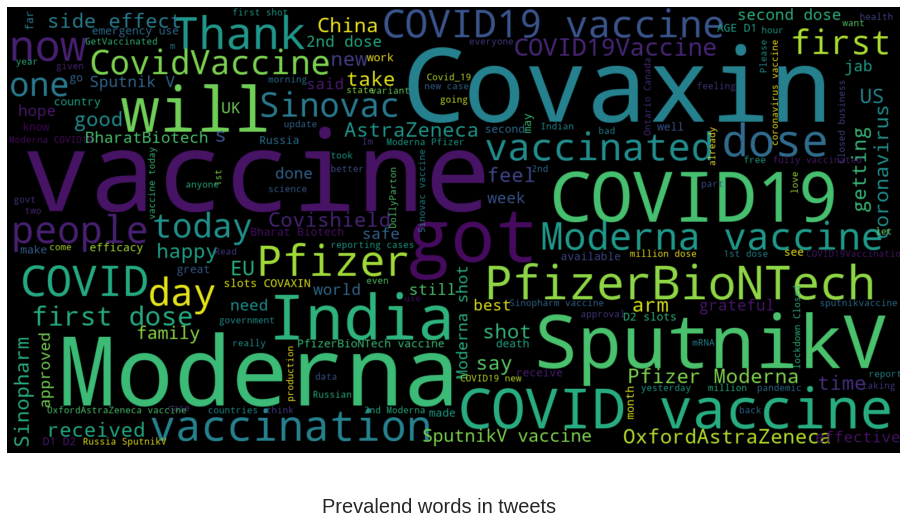

In [ ]:
show_wordcloud(tweets_df['tweet_text'] , title = 'Prevalend words in tweets')

# **Data Pre-Processing**

In [ ]:
'''
The next steps about data cleaning will be:
- Remove URLs from the tweets
- Tokenize text
- Remove emails
- Remove new lines characters
- Remove distracting single quotes
- Remove all punctuation signs
- Lowercase all text
- Detokenize text
- Convert list of texts to Numpy array
'''
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [ ]:
temp = []
#Splitting pd.Series to list
data_to_list = tweets_df["tweet_text"].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['Too bad they didnt order #Moderna or #JohnsonAndJohnsonVaccine FFS! Incompetent noobs....this means my… ',
 'Yes ❤️❤️❤️❤️🥰🥰🥰. AND THANK YOU! #Moderna Dolly Parton, 75, receives Moderna COVID-19 vaccine after $… ',
 'I wish anyone taking the mRNA vaccines good luck You’ll dearly need it #vaccine #Pfizer #Moderna ',
 'New crime against humanity :Israeli occupation banned the entry of 2000 shots of #SputnikV vaccine to… ',
 '#Covaxin airlifted?!? ?']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        

data_words = list(sent_to_words(temp))
print(data_words[:10],'\n')

[['too', 'bad', 'they', 'didnt', 'order', 'moderna', 'or', 'ffs', 'incompetent', 'noobs', 'this', 'means', 'my'], ['yes', 'and', 'thank', 'you', 'moderna', 'dolly', 'parton', 'receives', 'moderna', 'covid', 'vaccine', 'after'], ['wish', 'anyone', 'taking', 'the', 'mrna', 'vaccines', 'good', 'luck', 'you', 'll', 'dearly', 'need', 'it', 'vaccine', 'pfizer', 'moderna'], ['new', 'crime', 'against', 'humanity', 'israeli', 'occupation', 'banned', 'the', 'entry', 'of', 'shots', 'of', 'sputnikv', 'vaccine', 'to'], ['covaxin', 'airlifted'], ['update', 'brazil', 'grateful', 'to', 'russia', 'for', 'allowing', 'anvisa', 'to', 'inspect', 'sputnikv', 'production', 'ambassador', 'says', 'sputnikupdates'], ['deputy', 'pm', 'golikova', 'mln', 'russians', 'have', 'received', 'the', 'first', 'component', 'of', 'vaccine', 'against', 'covid', 'while', 'mln', 'already', 'got', 'their', 'second', 'shot', 'vaccination', 'is', 'currently', 'done', 'with', 'sputnikv', 'and', 'epivaccorona', 'third', 'and', 'fou

In [ ]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['too bad they didnt order moderna or ffs incompetent noobs this means my', 'yes and thank you moderna dolly parton receives moderna covid vaccine after', 'wish anyone taking the mrna vaccines good luck you ll dearly need it vaccine pfizer moderna', 'new crime against humanity israeli occupation banned the entry of shots of sputnikv vaccine to', 'covaxin airlifted']


In [ ]:
data = np.array(data)
#Create a sentiment column
tweets_df["sentiment"] = np.nan

In [ ]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
tweets_df['sentiment'] = tweets_df['tweet_text'].apply(lambda x: find_sentiment(x))
tweets_df.head(10)

,tweet_text,label,sentiment
0,@latingle Too bad they didn't order #Moderna o...,Negative,Negative
1,Yes @DollyParton ❤️❤️❤️❤️🥰🥰🥰. AND THANK YOU! #...,Positive,Positive
2,I wish anyone taking the mRNA vaccines good lu...,Positive,Positive
3,@BBCWorld New crime against humanity :Israeli ...,Negative,Negative
4,@BDUTT #Covaxin airlifted?!? ?,Neutral,Neutral
5,UPDATE | Brazil grateful to Russia for allowin...,Neutral,Positive
6,Deputy PM #Golikova: 5 mln Russians have recei...,Neutral,Neutral
7,Systemic #Reactions Reported within 7 Days aft...,Neutral,Neutral
8,@Jessicam6946 I can't wait to get my second an...,Positive,Negative
9,? ? ?? 5 more countries suspend use of #Vac...,Negative,Negative


In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}\n")  
    plt.tight_layout()
    plt.show()

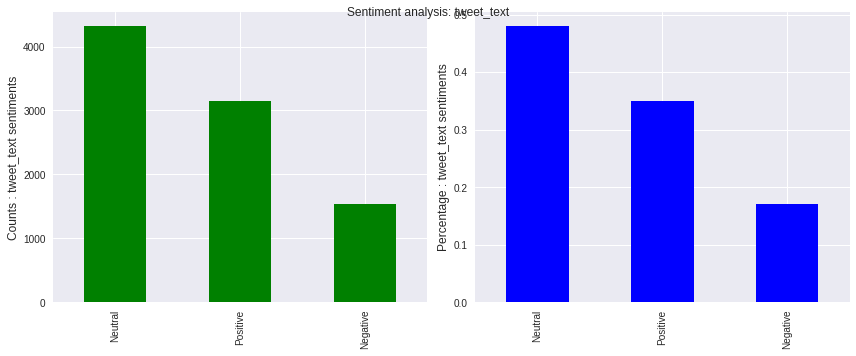

In [ ]:
plot_sentiment(tweets_df, 'label', 'tweet_text')

In [ ]:
# Label Encoding
labels = np.array(tweets_df["label"])
y = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    if labels[i] == 'Negative':
        y.append(1)
    if labels[i] == "Positive":
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [ ]:
# #Conver the word to vec
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   18  731   12]
 [   0    0    0 ...    5    2   45]
 [   0    0    0 ...    2   22    6]
 ...
 [   0    0    0 ... 2222    8    8]
 [   0    0    0 ...   24  119   31]
 [   0    0    0 ... 1324  416  290]]


In [ ]:
# print(labels)

In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (f"Our data split form:\n")
print(f"X_train: ",len(X_train))
print(f"X_test: ",len(X_test))
print(f"y_train: ",len(y_train))
print(f"y_test: ", len(y_test))

Our data split form:

X_train:  6750
X_test:  2250
y_train:  6750
y_test:  2250


# **Fine Tuned Pretrained BERT Model**

In [ ]:
tweets_df["labels"] = np.nan

In [ ]:
tweets_df["labels"] = tweets_df["label"].replace({'Neutral':0})
tweets_df["labels"] = tweets_df["labels"].replace({'Positive':1})
tweets_df["labels"] = tweets_df["labels"].replace({'Negative':2})

In [ ]:
RANDOM_SEED = 42
df_train, df_test = train_test_split(tweets_df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8100 entries, 2310 to 7270
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  8100 non-null   object
 1   label       8100 non-null   object
 2   sentiment   8100 non-null   object
 3   labels      8100 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 316.4+ KB


In [ ]:
!pip install -qq transformers


In [ ]:
#Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

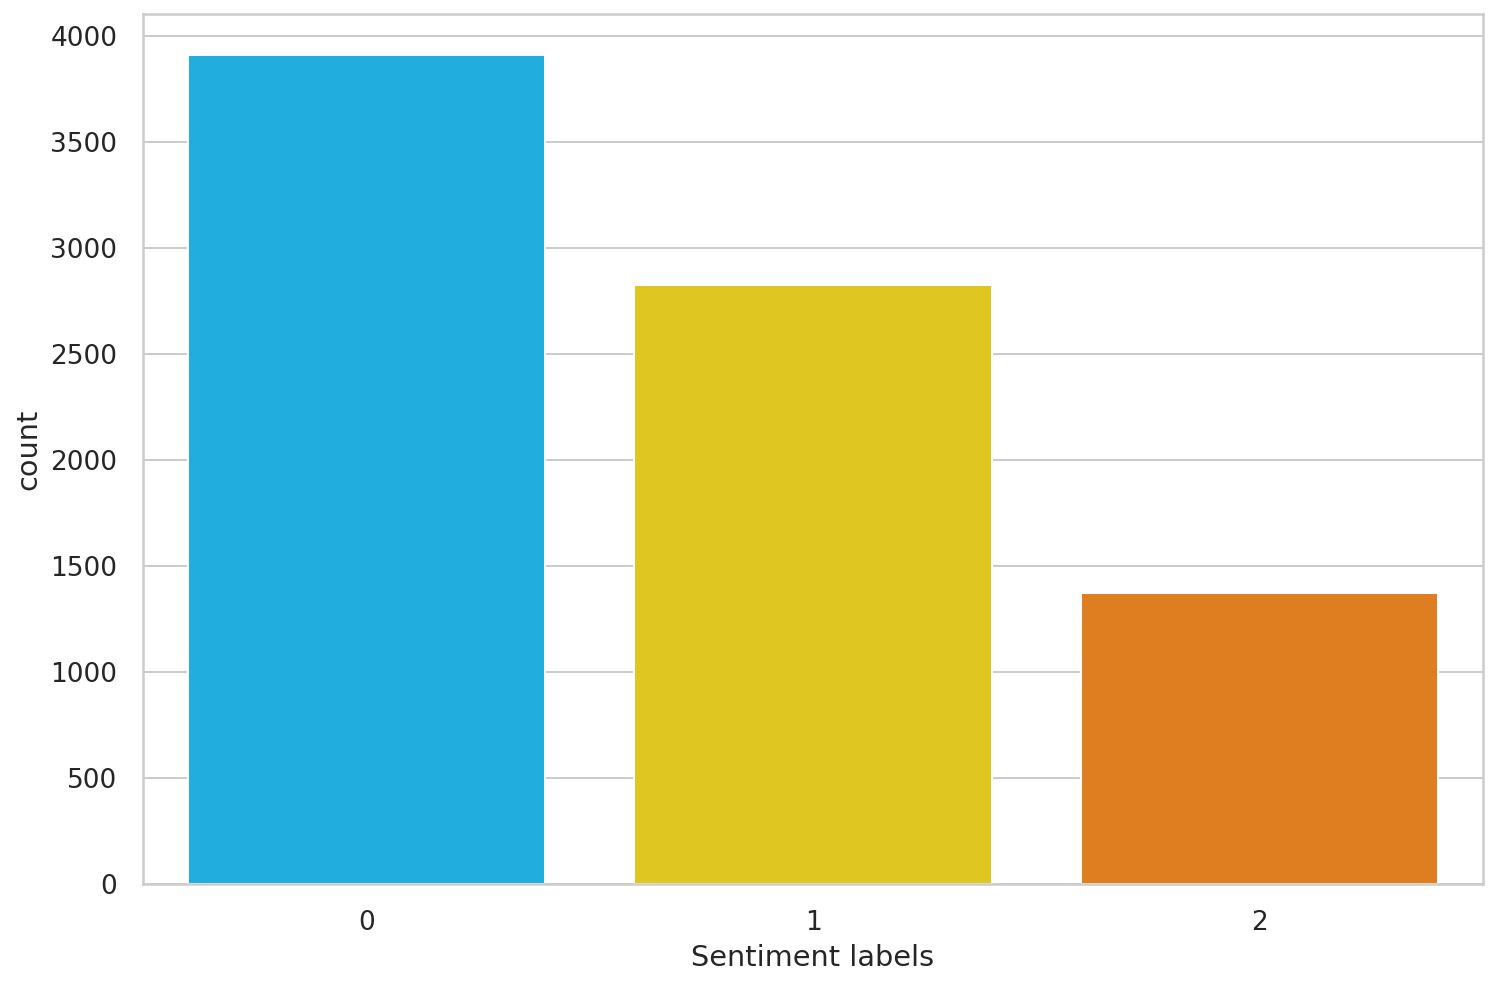

In [ ]:
sns.countplot(df_train.labels)
plt.xlabel('Sentiment labels');

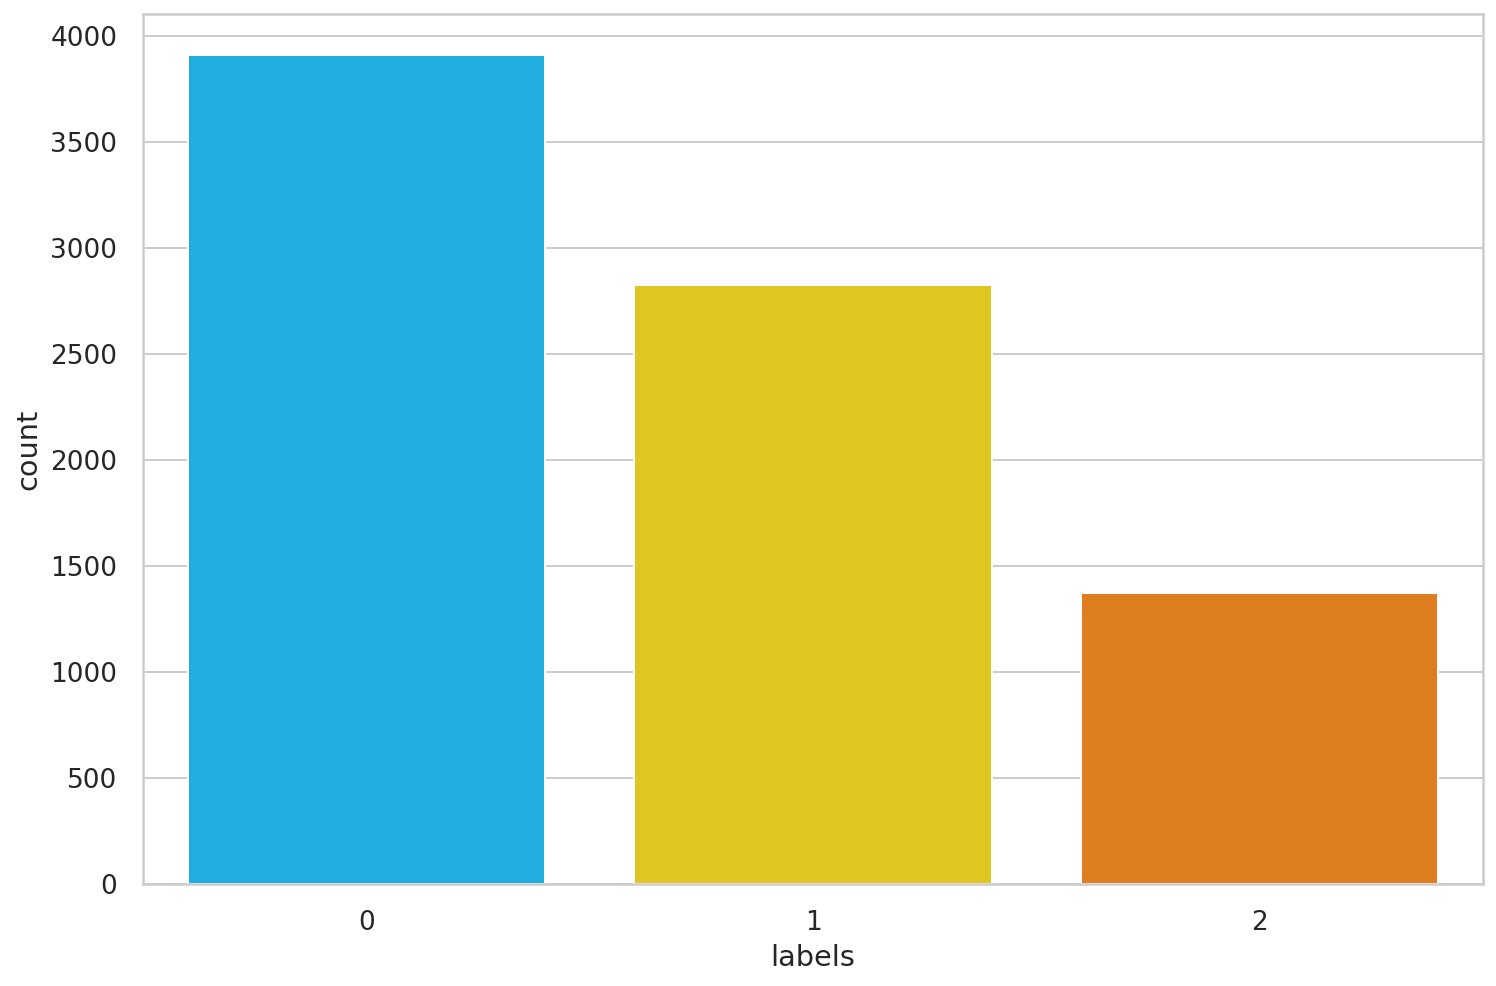

In [ ]:
sns.countplot(df_train.labels)
plt.xlabel('labels');

In [ ]:
class_names = ['Neutral','positive','negative']

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
token_lens = []

for txt in df_train.tweet_text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


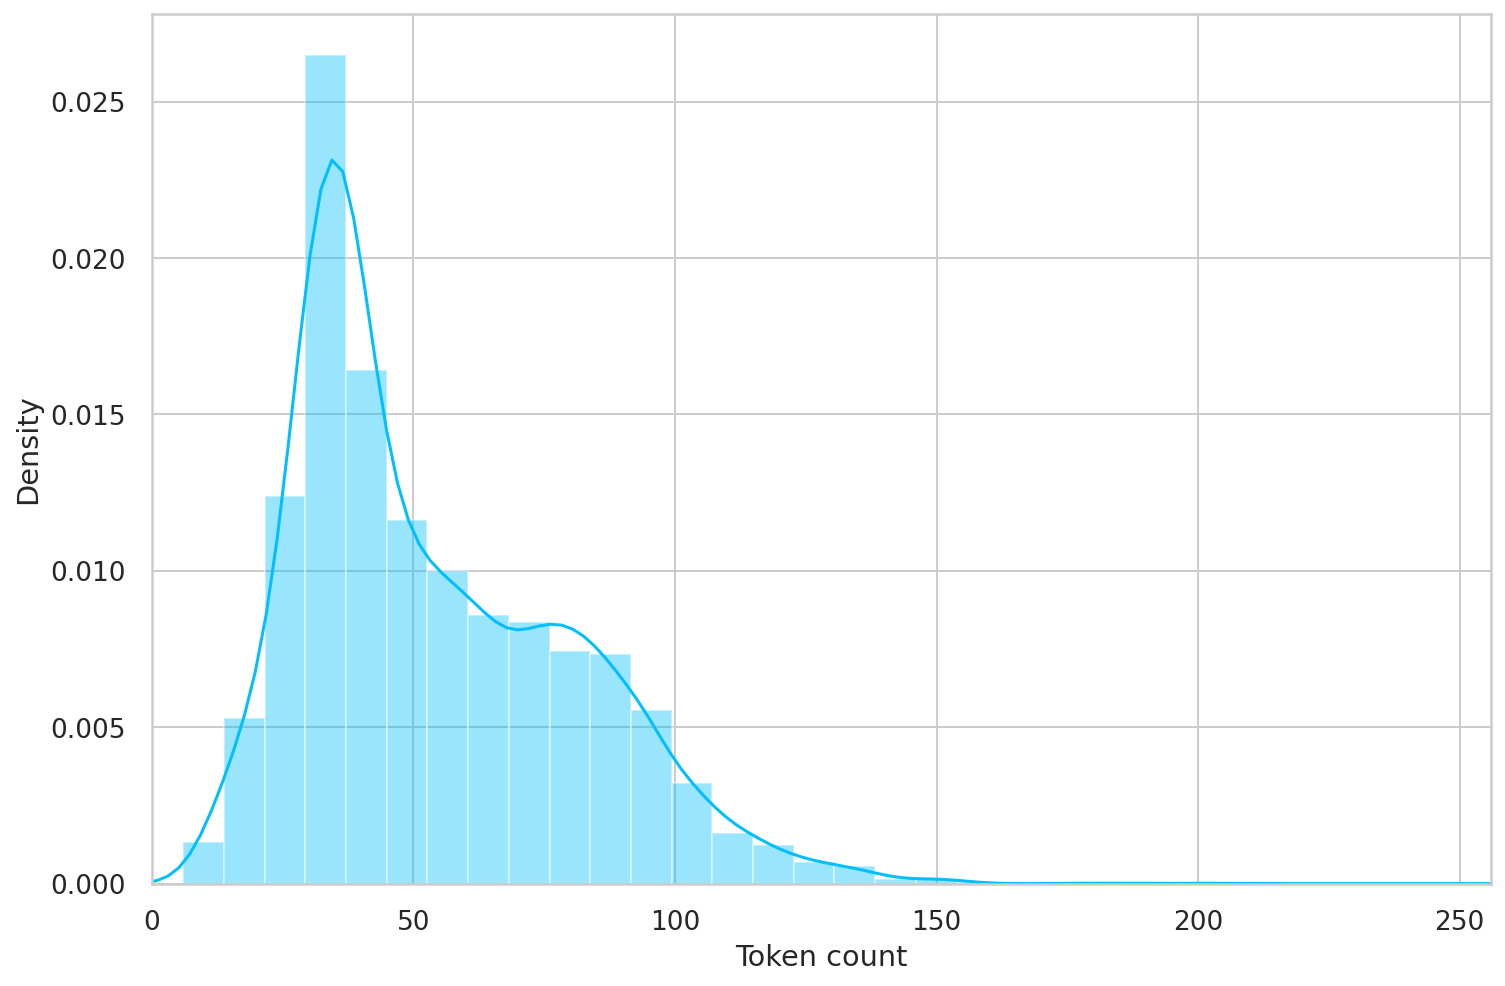

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 130

In [ ]:
class SentimentDataset(Dataset):

  def __init__(self, text, targets, tokenizer, max_len):
    self.text = text
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.text)
  
  def __getitem__(self, item):
    text = str(self.text[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      text,
      pad_to_max_length=True,
      max_length=self.max_len,
      add_special_tokens=True,
      return_token_type_ids=False,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'text': text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = SentimentDataset(
    text=df.tweet_text.to_numpy(),
    targets=df.labels.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size
  )

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((8100, 4), (450, 4), (450, 4))

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 130])
torch.Size([16, 130])
torch.Size([16])


In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_model.config.hidden_size

768

In [ ]:
class labelsClassifier(nn.Module):
  def __init__(self, n_classes):
    super(labelsClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    pooled_output = output[1]
    out = self.drop(pooled_output)
    return self.out(out)

In [ ]:
model = labelsClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 130])
torch.Size([16, 130])


In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.2330, 0.4610, 0.3060],
        [0.2435, 0.3518, 0.4047],
        [0.3383, 0.2518, 0.4099],
        [0.2017, 0.4059, 0.3924],
        [0.5323, 0.2201, 0.2476],
        [0.2464, 0.3927, 0.3609],
        [0.2646, 0.3202, 0.4152],
        [0.3518, 0.2628, 0.3853],
        [0.3654, 0.2153, 0.4193],
        [0.3176, 0.2121, 0.4704],
        [0.3441, 0.2261, 0.4298],
        [0.3197, 0.2084, 0.4719],
        [0.2253, 0.3714, 0.4033],
        [0.2567, 0.3182, 0.4251],
        [0.3330, 0.2606, 0.4064],
        [0.1337, 0.3984, 0.4679]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
EPOCHS = 5

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS


# Create a schedule with a learning rate that decreases linearly from the initial
# lr set in the optimizer to 0, after a warmup period during which it increases
# linearly from 0 to the initial lr set in the optimizer.
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0
EPOCHS = 5
for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), '/content/drive/MyDrive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/5
----------
Train loss 0.6376858005333229 accuracy 0.7354320987654321
Val   loss 0.5347131899204748 accuracy 0.7977777777777778

Epoch 2/5
----------
Train loss 0.37483247778428025 accuracy 0.8604938271604938
Val   loss 0.660457965115021 accuracy 0.7955555555555556

Epoch 3/5
----------
Train loss 0.23166751945565806 accuracy 0.9204938271604939
Val   loss 0.8593067683536431 accuracy 0.8

Epoch 4/5
----------
Train loss 0.14841350409683554 accuracy 0.958641975308642
Val   loss 1.080641017841368 accuracy 0.7822222222222223

Epoch 5/5
----------
Train loss 0.09938610604327242 accuracy 0.9732098765432099
Val   loss 1.12519078367743 accuracy 0.7822222222222223

CPU times: user 11min 25s, sys: 4min 50s, total: 16min 16s
Wall time: 16min 15s


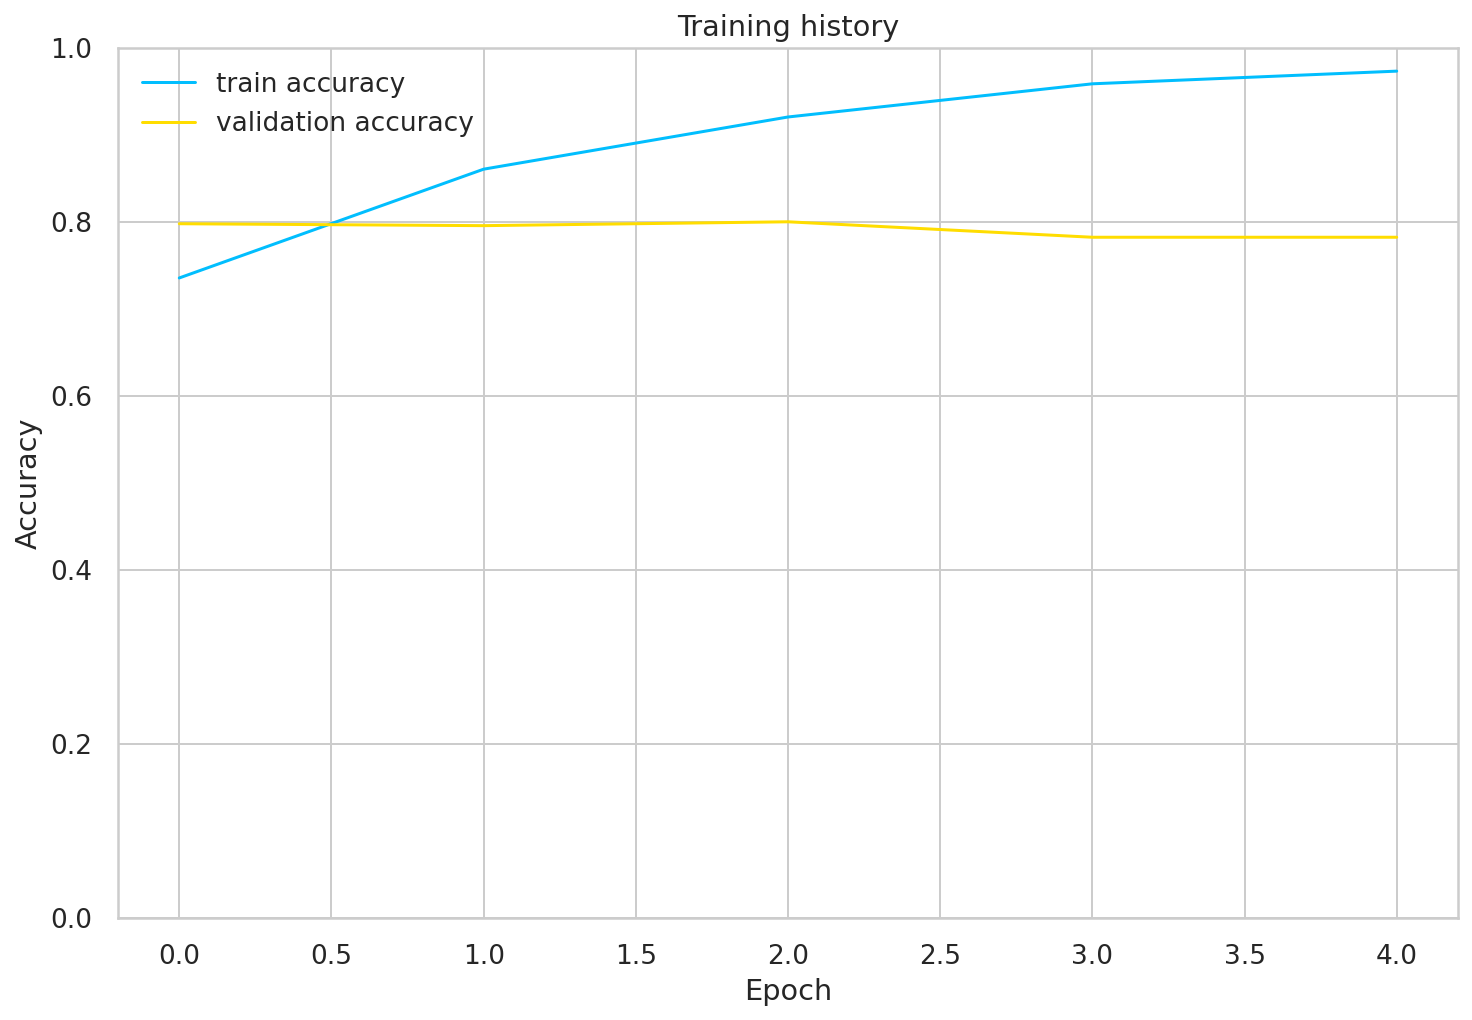

In [ ]:
history_cpu = {'train_acc':[],'val_acc':[]}
for tens in history['train_acc']:
  history_cpu['train_acc'].append(tens.to('cpu'))

for tens in history['val_acc']:
  history_cpu['val_acc'].append(tens.to('cpu'))
  
plt.plot(history_cpu['train_acc'] , label='train accuracy')
plt.plot(history_cpu['val_acc'] , label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
model = labelsClassifier(len(class_names))
model.load_state_dict(torch.load('/content/drive/MyDrive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model_state.bin'))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
test_acc,test_loss = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.7955555555555556

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  text = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      text.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return text, predictions, prediction_probs, real_values

In [ ]:
y_sentence, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     Neutral       0.80      0.79      0.79       212
    positive       0.76      0.88      0.82       154
    negative       0.89      0.65      0.75        84

    accuracy                           0.80       450
   macro avg       0.82      0.77      0.79       450
weighted avg       0.80      0.80      0.79       450



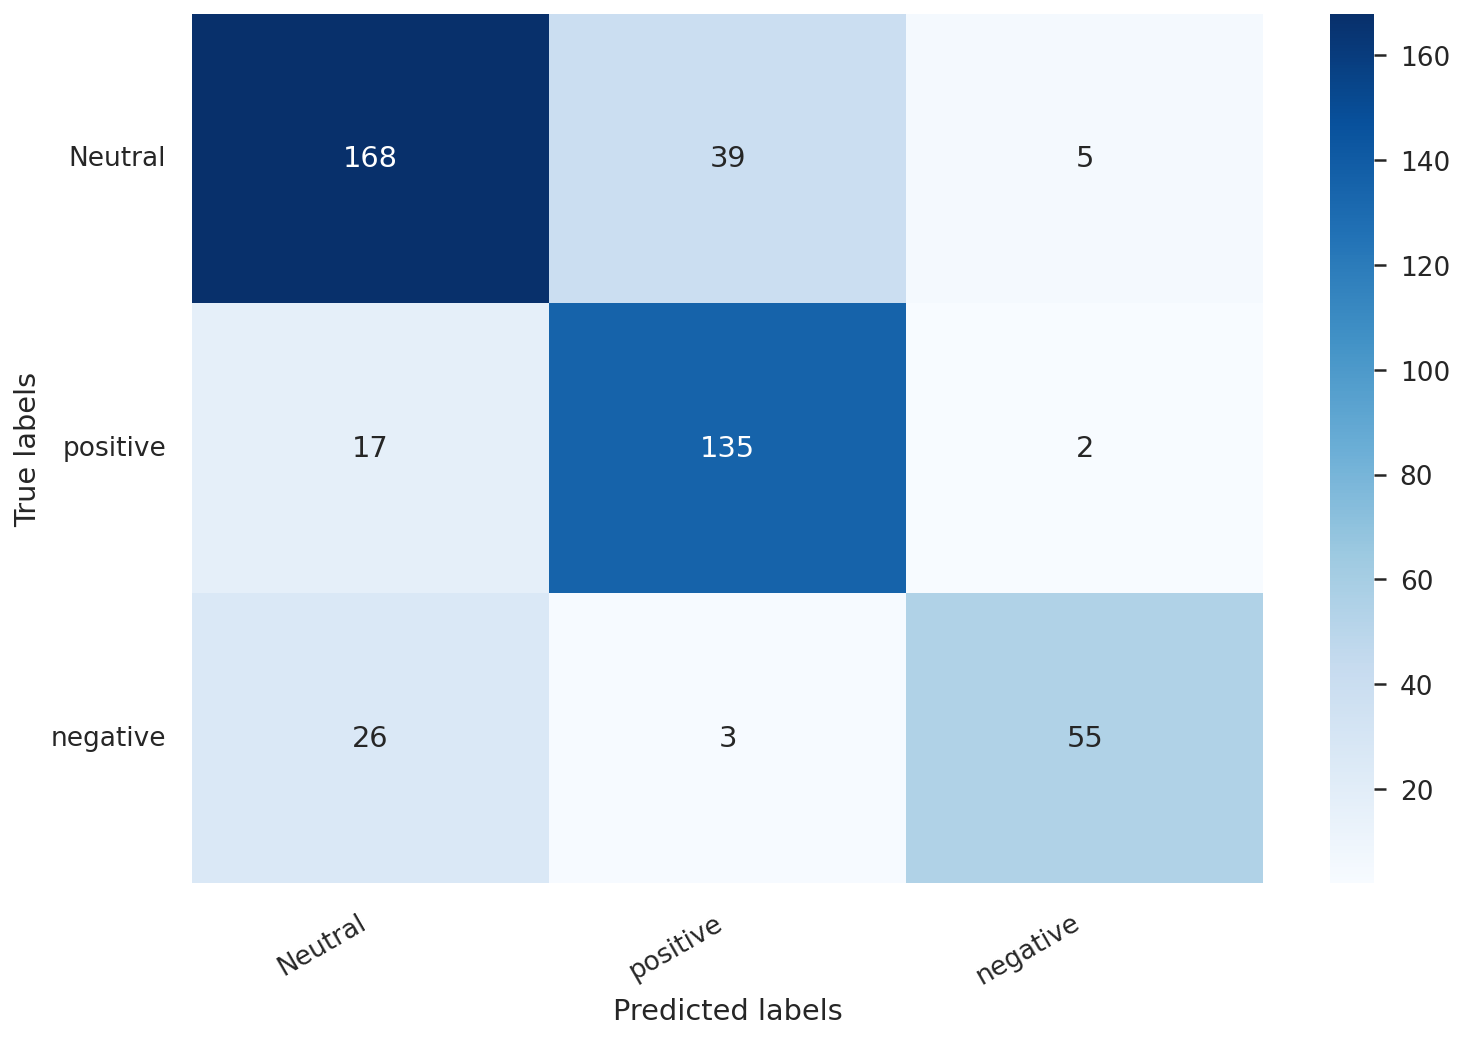

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels');
;
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

# **Single LSTM Model**

In [ ]:
Models_root = "/content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/"

In [ ]:
import logging
logging.getLogger('tensorflow').disabled = True
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint(Models_root+"best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history1 = model1.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/10
208/211 [============================>.] - ETA: 0s - loss: 0.9807 - accuracy: 0.5090
Epoch 1: val_accuracy improved from -inf to 0.56667, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model1.hdf5
211/211 [==============================] - 6s 14ms/step - loss: 0.9790 - accuracy: 0.5105 - val_loss: 0.9214 - val_accuracy: 0.5667
Epoch 2/10
208/211 [============================>.] - ETA: 0s - loss: 0.8046 - accuracy: 0.6456
Epoch 2: val_accuracy improved from 0.56667 to 0.64400, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model1.hdf5
211/211 [==============================] - 2s 9ms/step - loss: 0.8033 - accuracy: 0.6465 - val_loss: 0.7931 - val_accuracy: 0.6440
Epoch 3/10
210/211 [============================>.] - ETA: 0s - loss: 0.6847 - accuracy: 0.7164
Epoch 3: val_accuracy improved fro

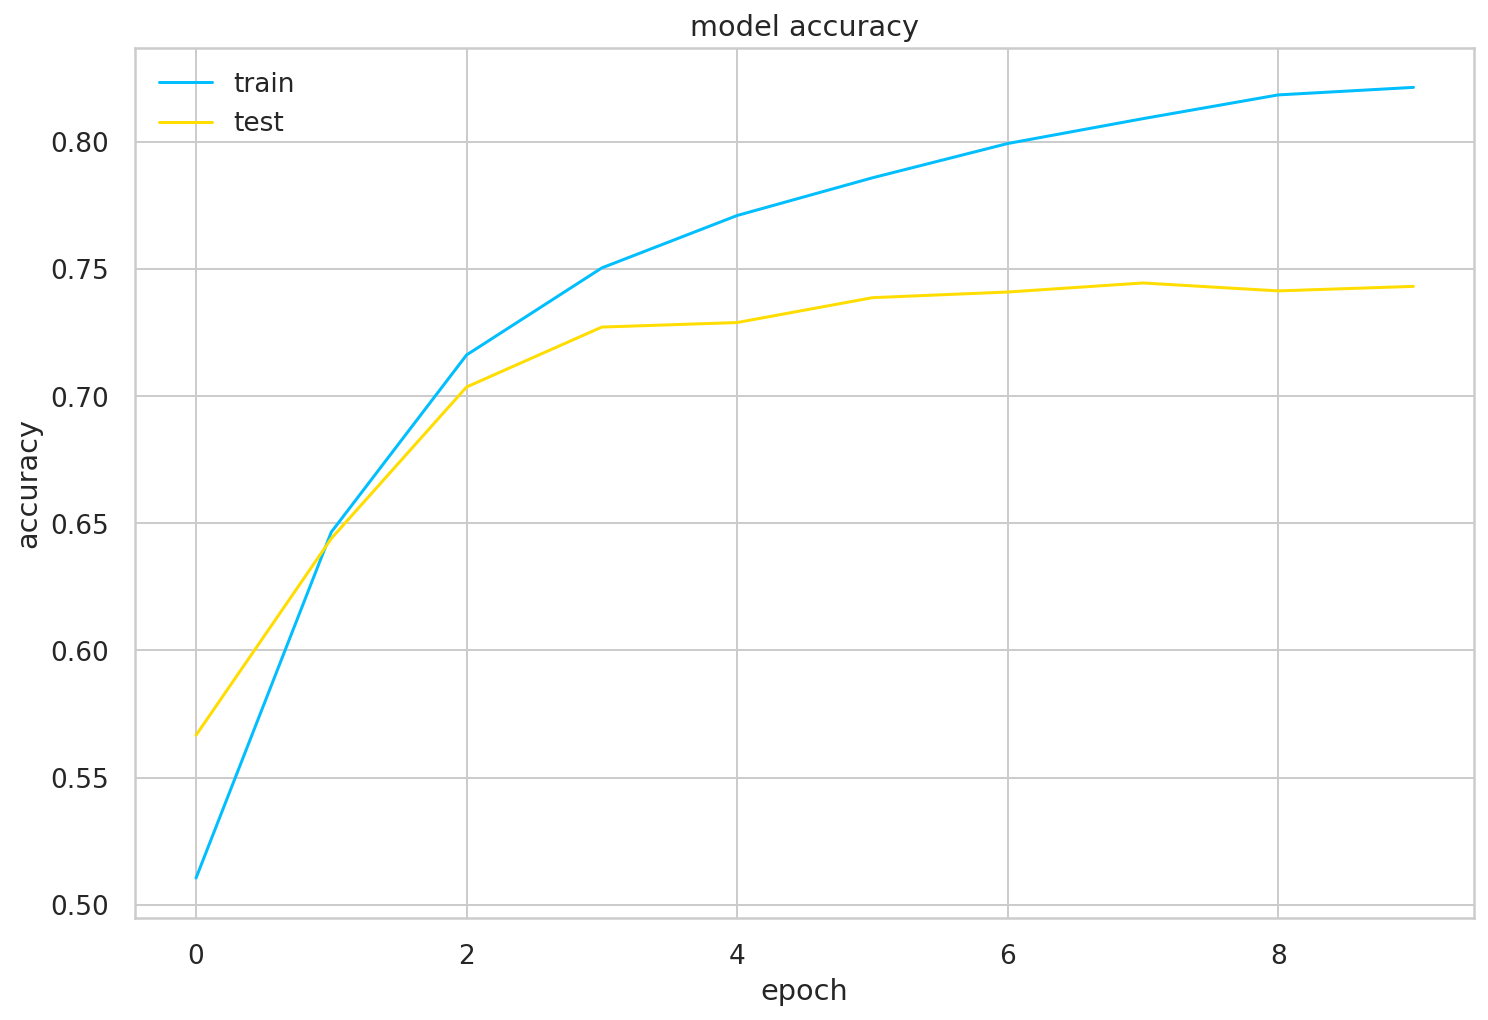

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

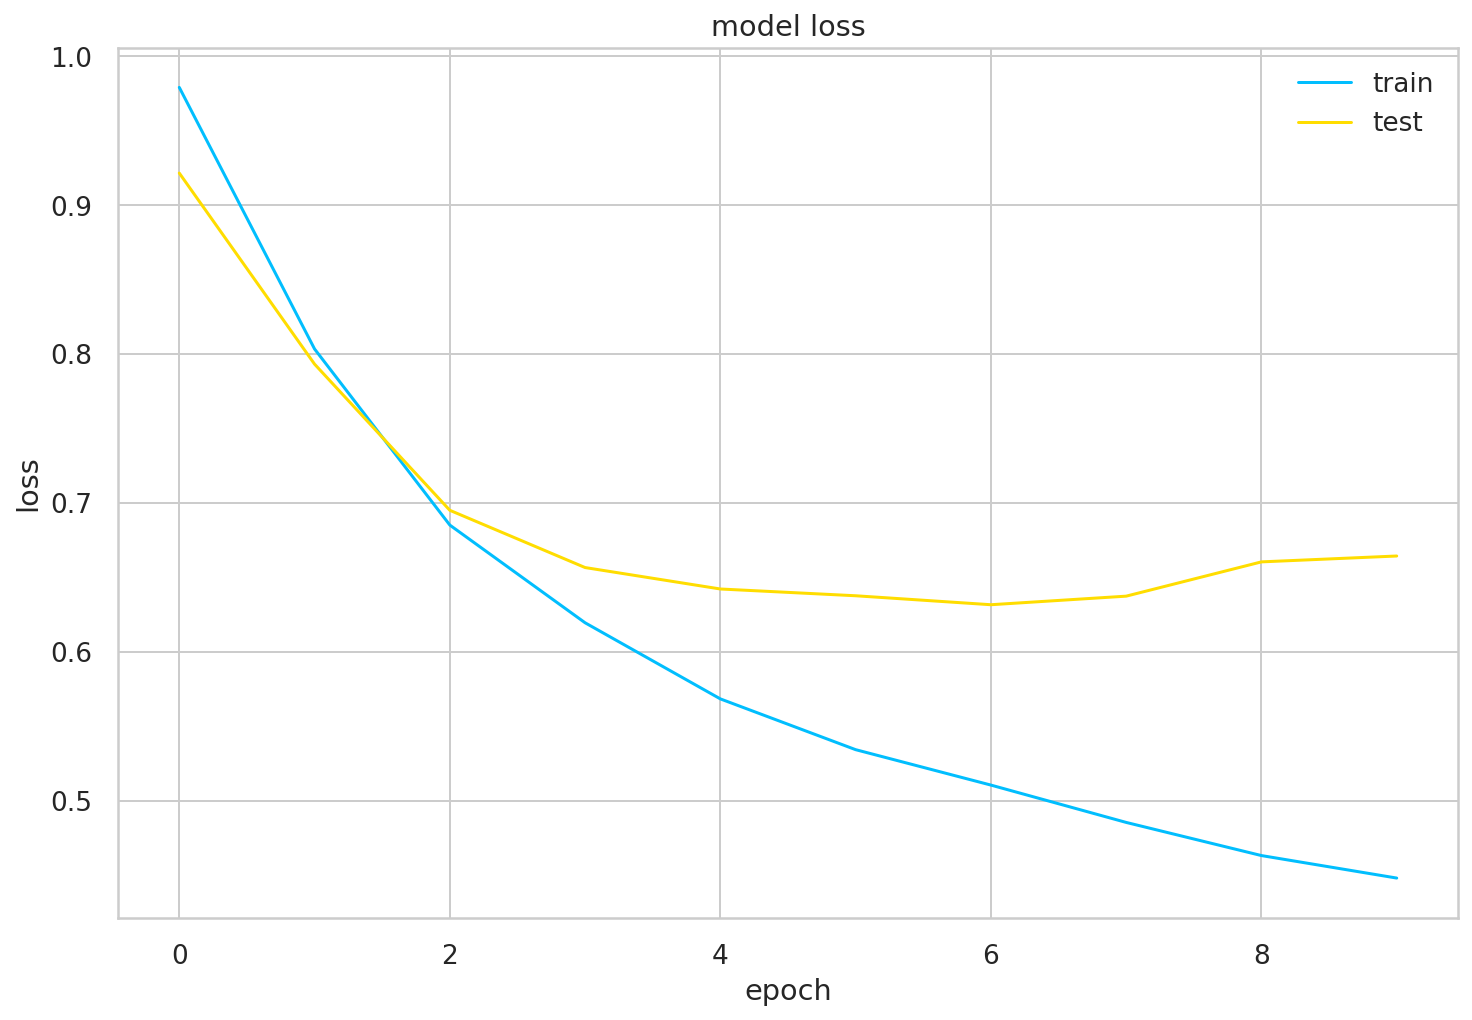

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_model = keras.models.load_model(Models_root+"best_model1.hdf5")

In [ ]:
lstmpredict = model1.predict(X_test)
print(lstmpredict)

71/71 [==============================] - 1s 4ms/step
[[0.91849655 0.01489456 0.06660888]
 [0.8258595  0.00430427 0.16983636]
 [0.56297    0.14120865 0.29582137]
 ...
 [0.35217515 0.03475866 0.6130662 ]
 [0.0832674  0.01186076 0.9048718 ]
 [0.9737562  0.0035887  0.02265501]]


In [ ]:
lstmpredict.shape

(2250, 3)

In [ ]:
X_test.shape

(2250, 200)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

71/71 - 1s - loss: 0.6373 - accuracy: 0.7444 - 733ms/epoch - 10ms/step
Model accuracy:  0.7444444298744202


In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(lstmpredict, axis=1)))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1048
           1       0.73      0.67      0.70       386
           2       0.83      0.64      0.72       816

    accuracy                           0.74      2250
   macro avg       0.76      0.72      0.73      2250
weighted avg       0.75      0.74      0.74      2250



# **Bidirectional LSTM Model**

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
# Save the Modek
checkpoint2 = ModelCheckpoint(Models_root+"best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
# Train the Model
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
211/211 [==============================] - ETA: 0s - loss: 0.9526 - accuracy: 0.5458
Epoch 1: val_accuracy improved from -inf to 0.61244, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model2.hdf5
211/211 [==============================] - 8s 22ms/step - loss: 0.9526 - accuracy: 0.5458 - val_loss: 0.8520 - val_accuracy: 0.6124
Epoch 2/10
211/211 [==============================] - ETA: 0s - loss: 0.7637 - accuracy: 0.6653
Epoch 2: val_accuracy improved from 0.61244 to 0.64444, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model2.hdf5
211/211 [==============================] - 3s 16ms/step - loss: 0.7637 - accuracy: 0.6653 - val_loss: 0.7665 - val_accuracy: 0.6444
Epoch 3/10
209/211 [============================>.] - ETA: 0s - loss: 0.6556 - accuracy: 0.7279
Epoch 3: val_accuracy improved fr

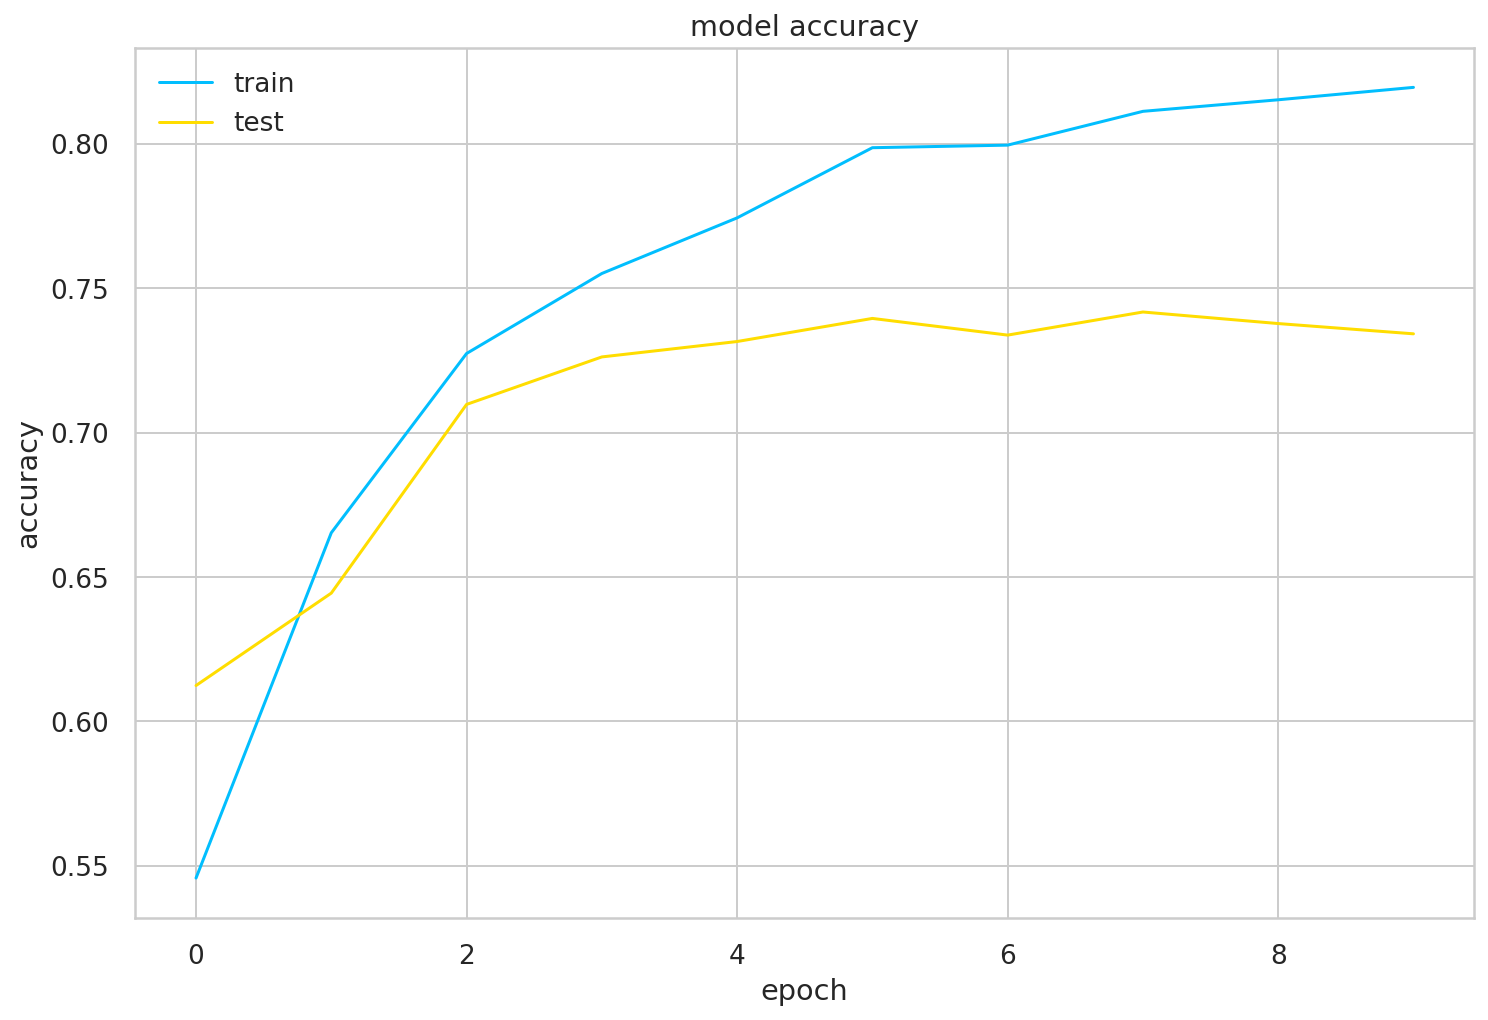

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

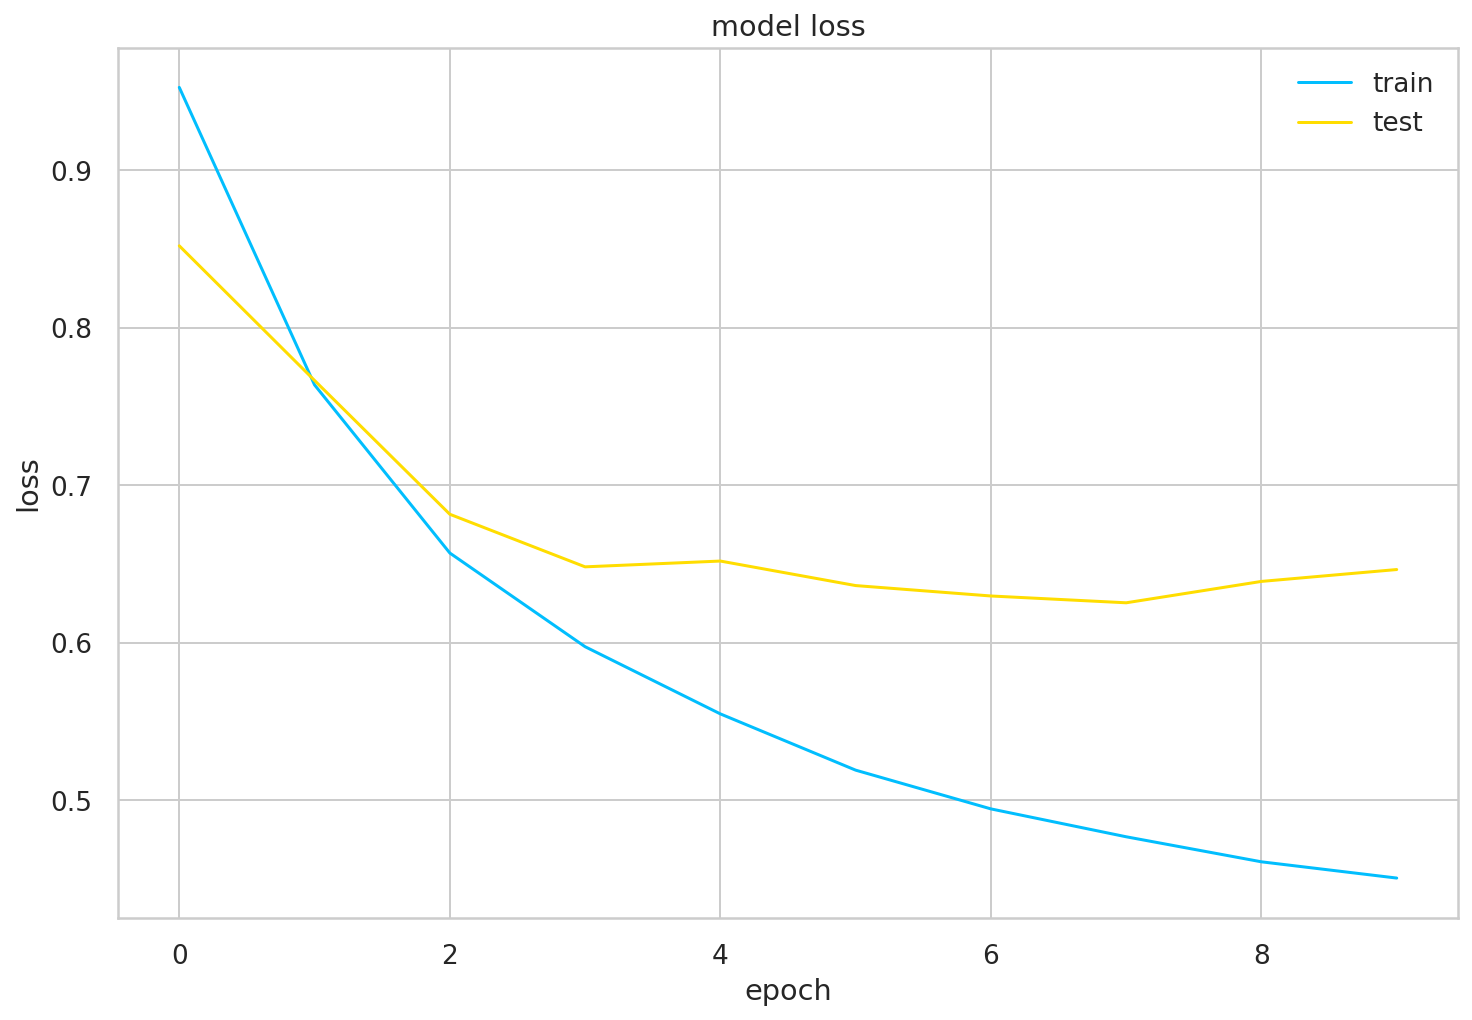

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_model = keras.models.load_model(Models_root+"best_model2.hdf5")

In [ ]:
secpredictions = best_model.predict(X_test)
print(secpredictions)

71/71 [==============================] - 1s 7ms/step
[[0.7934286  0.01775347 0.18881798]
 [0.6678962  0.00408267 0.32802114]
 [0.586232   0.11998972 0.29377824]
 ...
 [0.3072952  0.08899461 0.60371023]
 [0.16254152 0.01231028 0.8251482 ]
 [0.9527572  0.00524321 0.04199964]]


In [ ]:
secpredictions.shape

(2250, 3)

In [ ]:
y_test.shape

(2250, 3)

In [ ]:
test_loss2, test_acc2 = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc2)

71/71 - 1s - loss: 0.6253 - accuracy: 0.7418 - 1s/epoch - 15ms/step
Model accuracy:  0.741777777671814


In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(secpredictions, axis=1)))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1048
           1       0.71      0.72      0.71       386
           2       0.78      0.69      0.73       816

    accuracy                           0.74      2250
   macro avg       0.74      0.73      0.73      2250
weighted avg       0.74      0.74      0.74      2250



**Confusion Matrix**

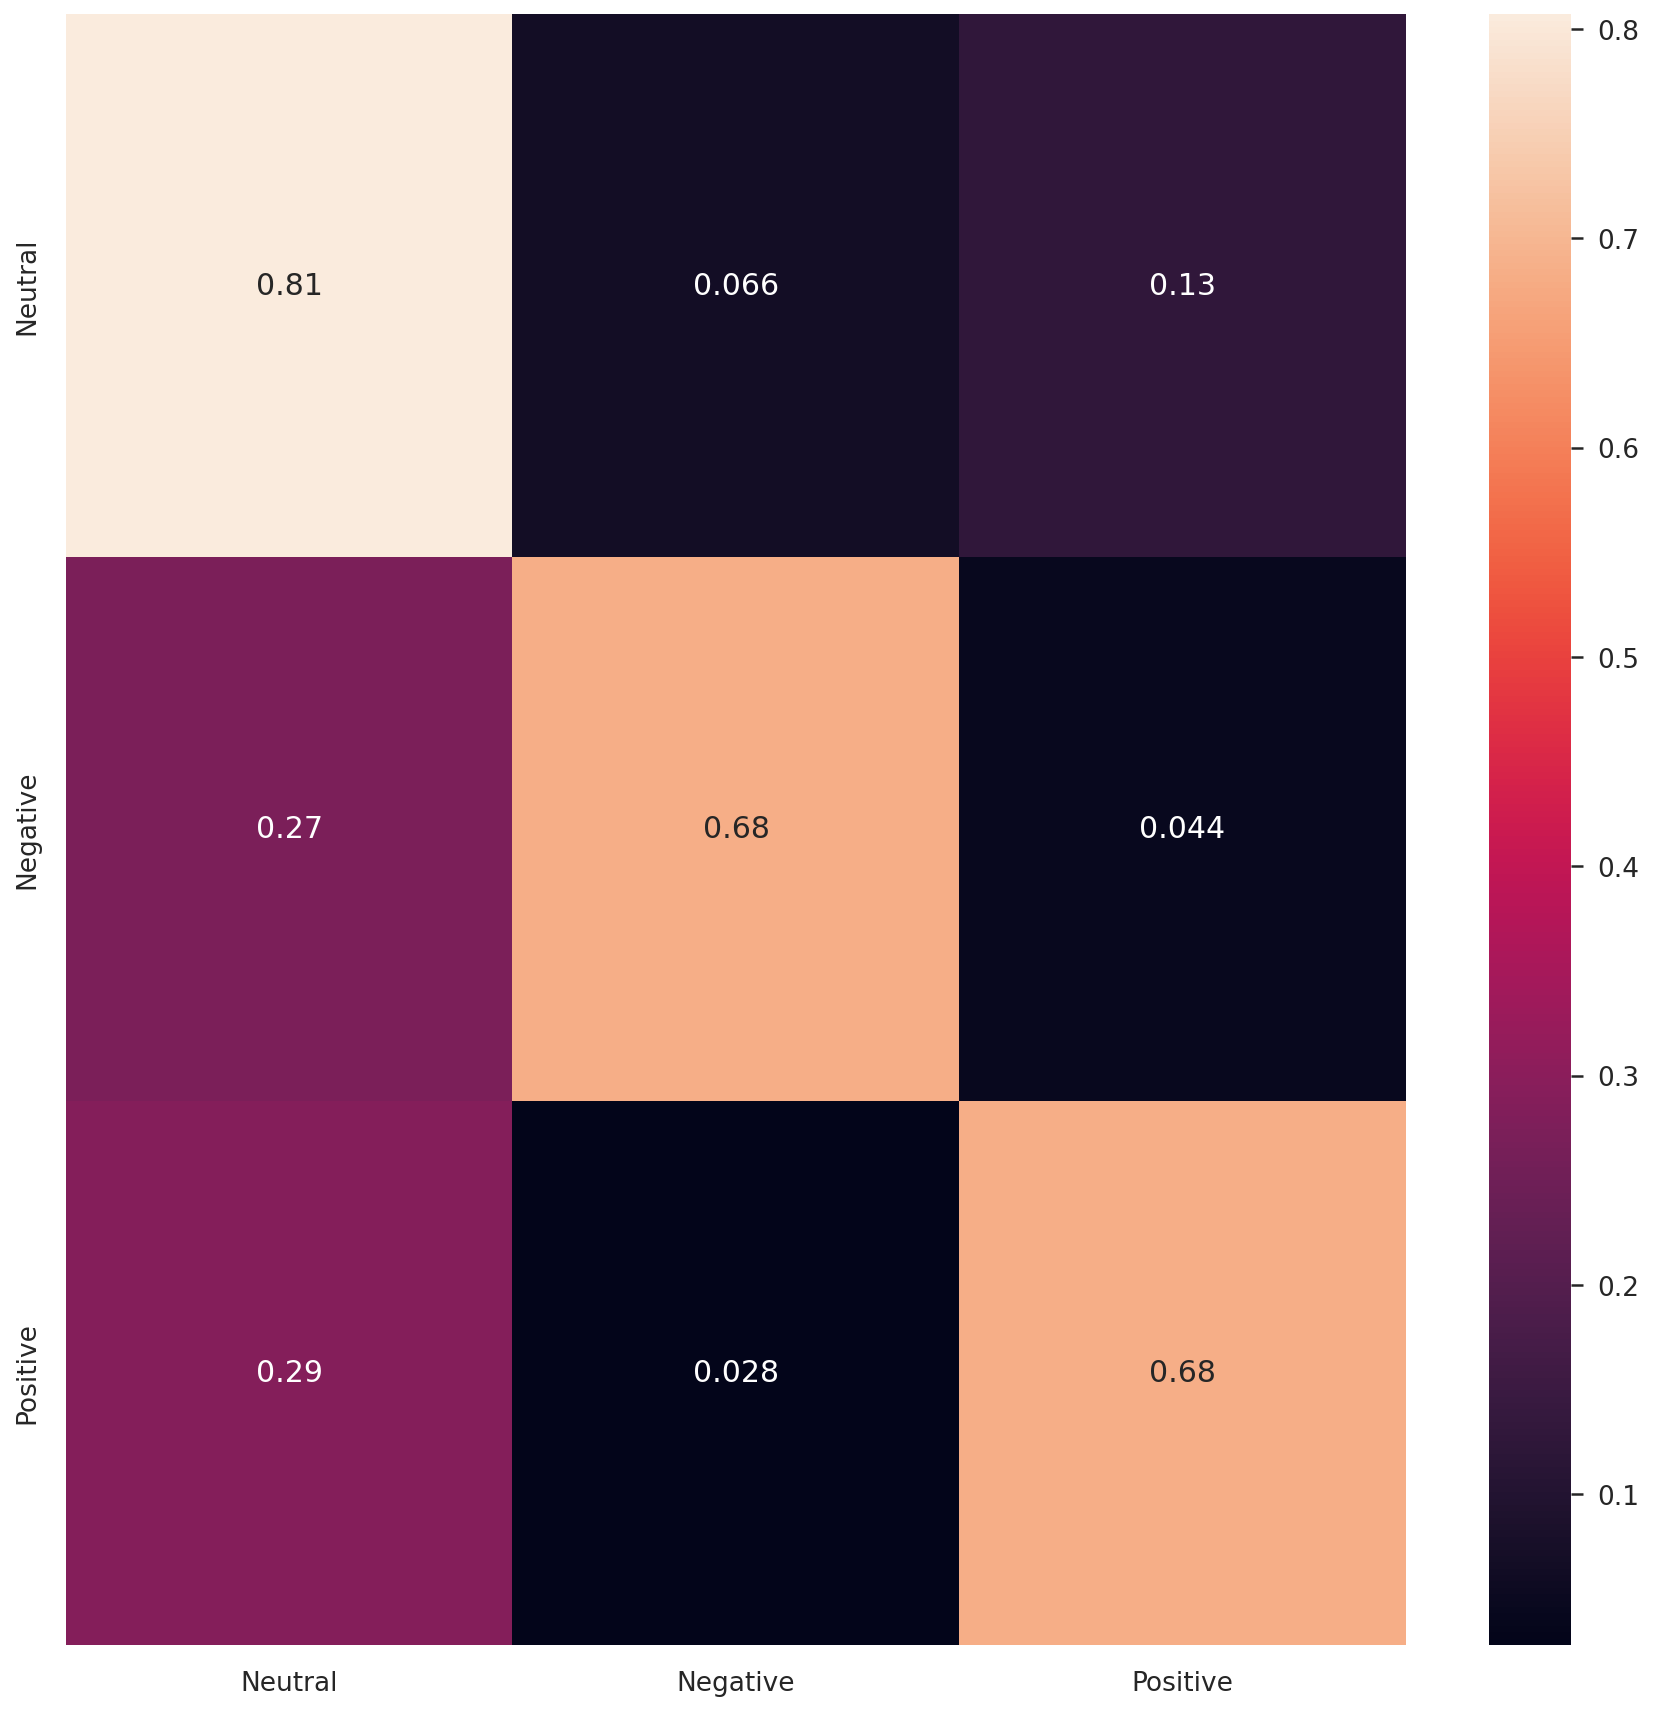

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(secpredictions, decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])

#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
seaborn.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})